# HT3. Clusters

Импорт библиотек

In [1]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

In [3]:
data = pd.read_excel('European.xlsx', index_col='Country')
X = data.values

## 1. Ierarchy

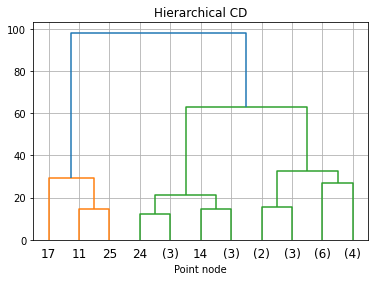

In [4]:
hierarchy = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hierarchy.fit(X)
plt.title('Hierarchical CD')
plot_dendrogram(hierarchy, truncate_mode='level', p=3)
plt.grid()
plt.xlabel('Point node')
plt.show()

In [5]:
hierarchy = AgglomerativeClustering(n_clusters=3)
hierarchy.fit(X)
data['hierarchy'] = hierarchy.labels_

In [6]:
n_clusters = 3
list(enumerate([', '.join(data[data['hierarchy'] == i].index) for i in range(n_clusters)],1))

[(1,
  'Belgium, Denmark, France, W_Germany, Ireland, Italy, Luxembourg, Netherlands, United_Kingdom, Austria, Finland, Norway, Sweden, Switzerland, E_Germany'),
 (2, 'Greece, Turkey, Yugoslavia'),
 (3,
  'Portugal, Spain, Bulgaria, Czechoslovakia, Hungary, Poland, Rumania, USSR')]

## 2. Clusters

## 2.1 Clusters (k=3)

In [7]:
means3 = KMeans(n_clusters=3)
means3.fit(X)
data['3-means'] = means3.labels_

In [8]:
n_clusters = 3
list(enumerate([', '.join(data[data['3-means'] == i].index) for i in range(n_clusters)],1))

[(1,
  'Belgium, Denmark, France, W_Germany, Italy, Luxembourg, Netherlands, United_Kingdom, Austria, Finland, Norway, Sweden, Switzerland, E_Germany'),
 (2,
  'Ireland, Portugal, Spain, Bulgaria, Czechoslovakia, Hungary, Poland, Rumania, USSR'),
 (3, 'Greece, Turkey, Yugoslavia')]

### 2.2 Clusters k = 5

In [9]:
means5 = KMeans(n_clusters=5)
means5.fit(X)
data['5-means'] = means5.labels_

In [10]:
n_clusters = 5
list(enumerate([', '.join(data[data['5-means'] == i].index) for i in range(n_clusters)],1))

[(1,
  'Belgium, Denmark, France, Netherlands, United_Kingdom, Finland, Norway, Sweden'),
 (2,
  'W_Germany, Italy, Luxembourg, Austria, Switzerland, Czechoslovakia, E_Germany'),
 (3, 'Greece, Yugoslavia'),
 (4, 'Ireland, Portugal, Spain, Bulgaria, Hungary, Poland, Rumania, USSR'),
 (5, 'Turkey')]

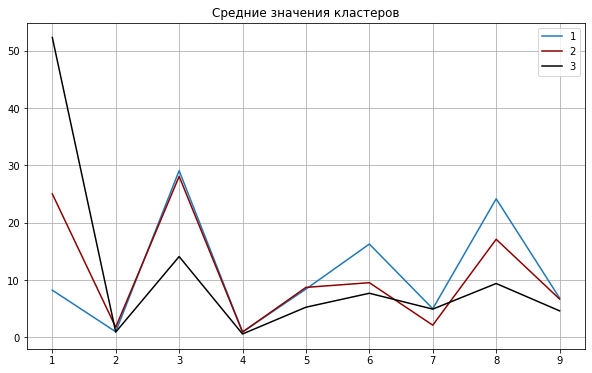

In [11]:
cluster1, cluster2, cluster3 = data.drop(columns=['hierarchy', '5-means']).groupby(by=['3-means']).mean().values
ind = np.arange(1, len(cluster1) + 1)

fig, ax  = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(ind, cluster1, label='1')
ax.plot(ind, cluster2, label='2',color = 'darkred')
ax.plot(ind, cluster3, label='3',color = 'black')
ax.set_title('Средние значения кластеров')
ax.legend()
ax.grid()
plt.show()

### 2.3 silhouette_score

In [12]:
print(f'Silhouette score 3-means: {float(silhouette_score(X, means3.labels_)):.3f}')
print(f'Silhouette score 5-means: {float(silhouette_score(X, means5.labels_)):.3f}')
print(f'Silhouette score ierarchy: {float(silhouette_score(X, hierarchy.labels_)):.3f}')

Silhouette score 3-means: 0.407
Silhouette score 5-means: 0.326
Silhouette score ierarchy: 0.386


In [13]:
import seaborn as sns

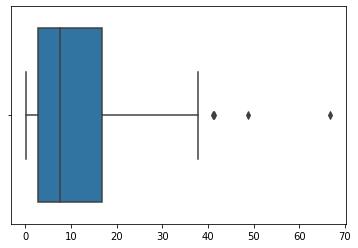

In [14]:
sns.boxplot(X)